In [2]:
import pandas as pd
import numpy as np
from twarc import Twarc
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

In [3]:
df = pd.read_csv("retweet_July_12_20_23.csv", sep="|")

In [14]:
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

In [15]:
t = Twarc(consumer_key, consumer_secret, access_token, access_token_secret)

In [74]:
df

,tweet_id,count,created_time,next_update,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,100
0,1272173594043453440,2,2020-06-14 14:26:35+00:00,2020-06-16 14:26:35+00:00,8597,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1272182279062933504,2,2020-06-14 15:01:05+00:00,2020-06-16 15:01:05+00:00,215,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1272185281119227907,2,2020-06-14 15:13:01+00:00,2020-06-16 15:13:01+00:00,1166,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1272187048804462592,2,2020-06-14 15:20:03+00:00,2020-06-16 15:20:03+00:00,243,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1272189836657598465,2,2020-06-14 15:31:07+00:00,2020-06-16 15:31:07+00:00,809,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38712,1282090625190461441,2,Sat Jul 11 23:13:19 +0000 2020,2020-07-13 23:13:19+00:00,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
38713,1282091053538041856,2,Sat Jul 11 23:15:01 +0000 2020,2020-07-13 23:15:01+00:00,23,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
38714,1282091057799364609,2,Sat Jul 11 23:15:02 +0000 2020,2020-07-13 23:15:02+00:00,78,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
38715,1282091529834835968,2,Sat Jul 11 23:16:55 +0000 2020,2020-07-13 23:16:55+00:00,108,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [91]:
# get rows with only 7 days or more of data, drop all other rows and unused columns
#columns = ["tweet_id", "count", "created_time", "1", "2", "3", "4", "5", "6","7", "user_id", "screen_name", "url", "follower_count"]
#one_week = pd.DataFrame(columns=columns)
#df.drop(df[df["7"] == -1].index, inplace=True)
#one_week = df.drop(columns=df.columns[(df == -1).any()])
one_week = df

## Get 10 days of data
columns = ["tweet_id", "count", "created_time", "1", "2", "3", "4", "5", "6", "user_id", "screen_name", "url", "follower_count"]
one_week = pd.DataFrame(columns=columns)
df.drop(df[df["6"] == -1].index, inplace=True)
one_week = df.drop(columns=df.columns[(df == -1).any()])
one_week.shape

(30880, 10)

In [76]:
max_list = list()
for index, row in one_week.iterrows():
    num_list = list()
    num_list = {row["1"], row["2"],row["3"], row["4"],row["5"], row["6"], row["7"], row["8"], row["9"], row["10"]}
    max_list.append(max(num_list))
one_week["max_retweets"] = max_list

In [77]:
mean = one_week["max_retweets"].mean()
median = one_week["max_retweets"].median()
print("mean: ", mean, "\nmedian: ", median)

mean:  141.39262814359762 
median:  48.0


In [78]:
delta0 = list()
delta1 = list()
delta2 = list()
delta3 = list()
delta4 = list()
delta5 = list()
delta6 = list()
delta7 = list()
delta8 = list()
delta9 = list()

delta_list = list()
delta_list.append(delta0)
delta_list.append(delta1)
delta_list.append(delta2)
delta_list.append(delta3)
delta_list.append(delta4)
delta_list.append(delta5)
delta_list.append(delta6)
delta_list.append(delta7)
delta_list.append(delta8)
delta_list.append(delta9)



for index,row in one_week.iterrows():
    delta0.append(int(row["1"]) - 0)
    delta1.append(int(row["2"])-int(row["1"]))
    delta2.append(int(row["3"])-int(row["2"]))
    delta3.append(int(row["4"])-int(row["3"]))
    delta4.append(int(row["5"])-int(row["4"]))
    delta5.append(int(row["6"])-int(row["5"]))
    delta6.append(int(row["7"])-int(row["6"]))
    delta7.append(int(row["8"])-int(row["7"]))
    delta8.append(int(row["9"])-int(row["8"]))        
    delta9.append(int(row["10"])-int(row["9"]))    

In [79]:
count=0
for i in delta_list:
    minimum = min(i)
    maximum = max(i)
    median = np.median(i)
    mean = statistics.mean(i)
    count += 1
    print("Delta ", count, "Min: ", minimum, " Max: ", maximum, " Median: ", median, " Mean: ", mean)
    

Delta  1 Min:  0  Max:  30579  Median:  47.0  Mean:  135.5377615665195
Delta  2 Min:  -15  Max:  2310  Median:  0.0  Mean:  3.8098291418698405
Delta  3 Min:  -26  Max:  1516  Median:  0.0  Mean:  0.8602418890382031
Delta  4 Min:  -18  Max:  842  Median:  0.0  Mean:  0.3394125551929353
Delta  5 Min:  -16  Max:  210  Median:  0.0  Mean:  0.08942215396429257
Delta  6 Min:  -20  Max:  284  Median:  0.0  Mean:  0.08266461892877712
Delta  7 Min:  -13  Max:  501  Median:  0.0  Mean:  0.05617200998272221
Delta  8 Min:  -27  Max:  810  Median:  0.0  Mean:  0.015511614513342292
Delta  9 Min:  -16  Max:  383  Median:  0.0  Mean:  -0.04369360721827606
Delta  10 Min:  -23  Max:  16  Median:  0.0  Mean:  -0.09149548857746208


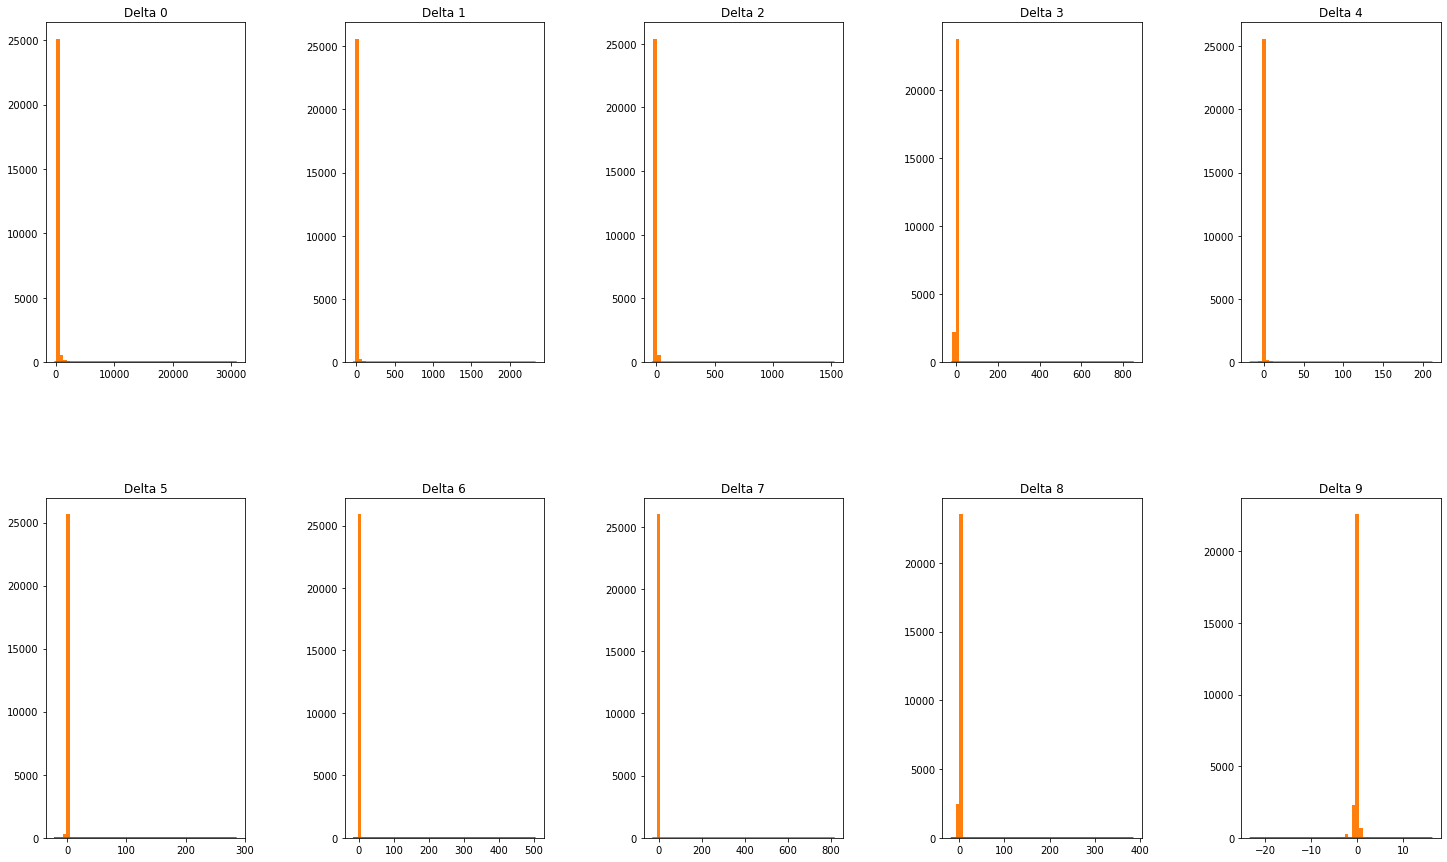

In [80]:
count = 1
fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for i in delta_list:
    ax = fig.add_subplot(2, 5, count)
    sns.distplot(i, ax=ax)
    ax.hist(i, density=False, bins=50) 
    #mean = str(int(scipy.mean(value)))
    #tweets = str(len(value))
    #ax.title.set_text(str(key + " #: " + tweets + "\n mean(" + mean + ")"))
    ax.title.set_text(str("Delta " + str(count-1)))
    #ax.text(25, 35, str("mean: " + mean),fontsize=8, ha='center')
    #plt.subplot(5,3,count)
    #plt.hist(outlet_lists['CNN'], density=False, bins=10) 
    count += 1
#sns.distplot(outlet_lists["The Wall Street Journal"])

In [81]:
max_day = list()

for index, row in one_week.iterrows():
    num_list = list()
    num_list = {row["1"], row["2"],row["3"], row["4"],row["5"], row["6"], row["7"], row["8"], row["9"], row["10"]}
    maximum = (max(num_list))
    if maximum is row["1"]:
        max_day.append(1)
        continue
    elif maximum is row["2"]:
        max_day.append(2)
        continue
    elif maximum is row["3"]:
        max_day.append(3)
        continue
    elif maximum is row["4"]:
        max_day.append(4)
        continue
    elif maximum is row["5"]:
        max_day.append(5)
        continue
    elif maximum is row["6"]:
        max_day.append(6)
        continue
    elif maximum is row["7"]:
        max_day.append(7)
        continue
    elif maximum is row["8"]:
        max_day.append(8)
        continue
    elif maximum is row["9"]:
        max_day.append(9)
        continue
    else:
        max_day.append(10)
        continue
one_week["max_day"] = max_day

In [83]:
##one_week.hist(column='max_day', bins=6, figsize=(15,10))
#sns.distplot(one_week["max_day"])
one_week['max_day'].value_counts(normalize=True) * 100

1     53.787675
2     20.652716
3      8.051449
4      5.432905
5      3.444039
6      2.445767
7      2.219236
8      1.758495
9      1.370705
10     0.837013
Name: max_day, dtype: float64

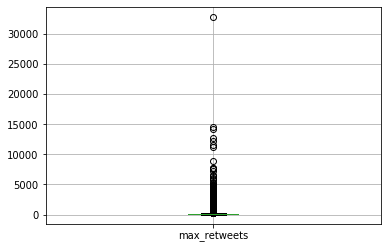

In [15]:
boxplot = one_week.boxplot(column=['max_retweets'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf87f90>,
      dtype=object)

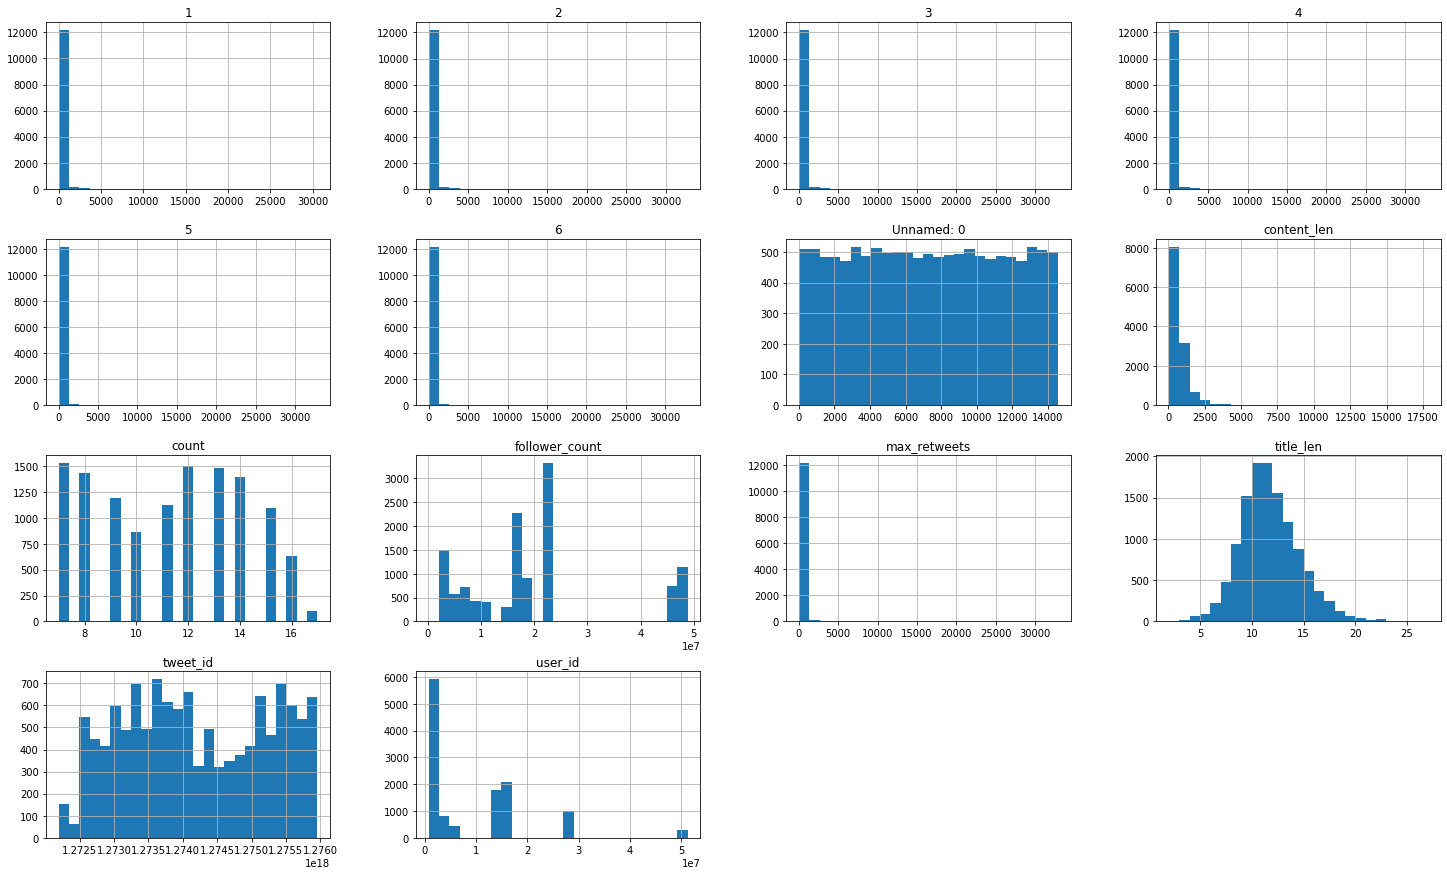

In [22]:
one_week.hist(column='max_retweets', bins=25, figsize=(25,15))

In [17]:
# Remove outliers
q_low = one_week["max_retweets"].quantile(0.01)
q_hi  = one_week["max_retweets"].quantile(0.99)
one_week_filtered = one_week[(one_week["max_retweets"] < q_hi) & (one_week["max_retweets"] > q_low)]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ccd2310>]],
      dtype=object)

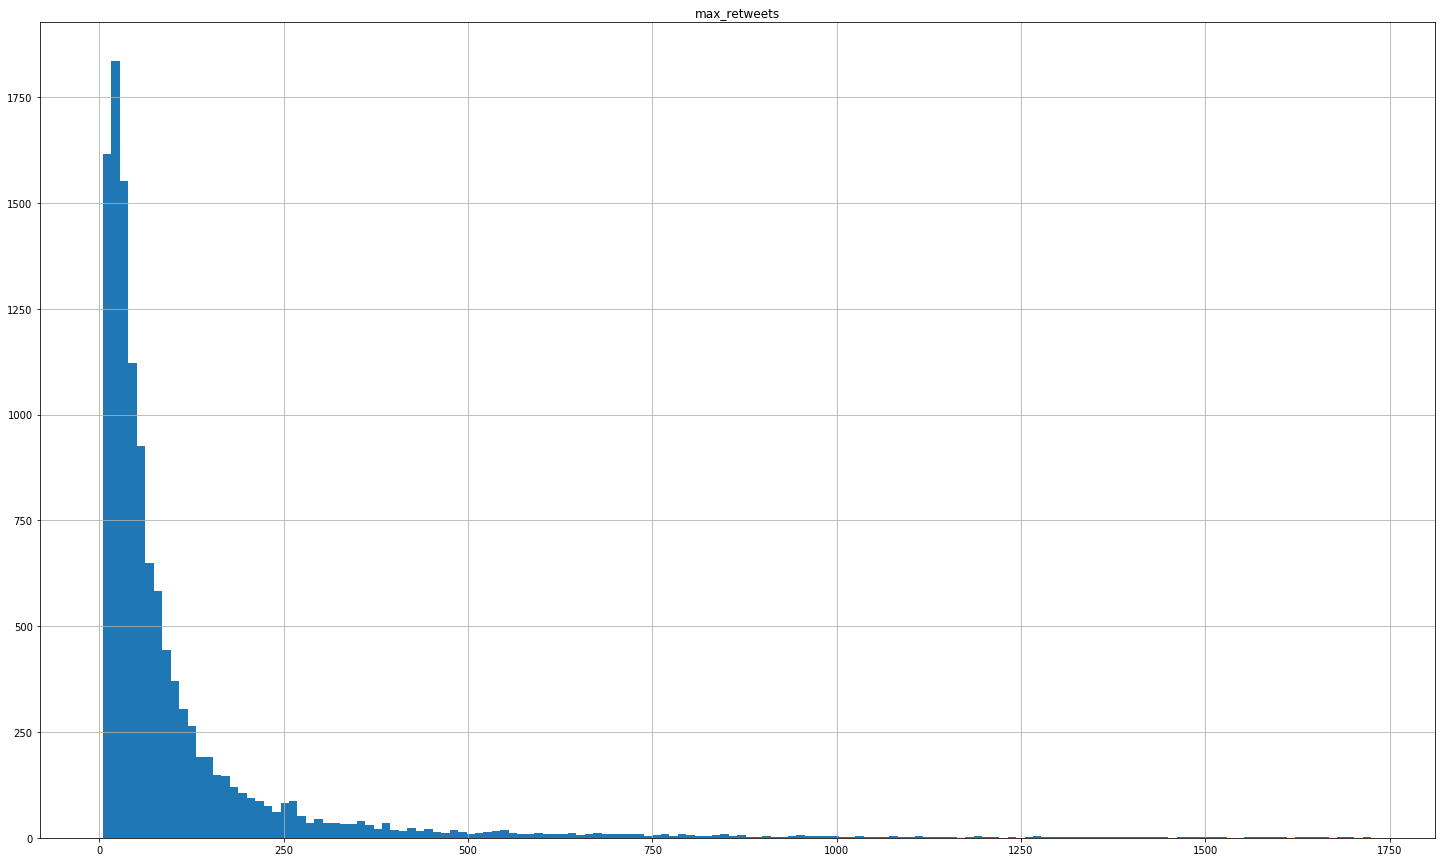

In [18]:
one_week_filtered.hist(column='max_retweets', bins=150, figsize=(25,15))

In [134]:
accounts = ["CNN","The Wall Street Journal","The Washington Post","NBC News",
            "The Associated Press","ABC News","Los Angeles Times","The New York Times","NPR","TIME","U.S. News","USA TODAY",
            "Fox News","Reuters","HuffPost"]
outlet_lists = {}
for outlet in accounts:
    outlet_lists[outlet] = []

In [ ]:
for index, row in one_week.iterrows():
    outlet_lists[row["screen_name"]].append(row["max_retweets"])
outlet_lists

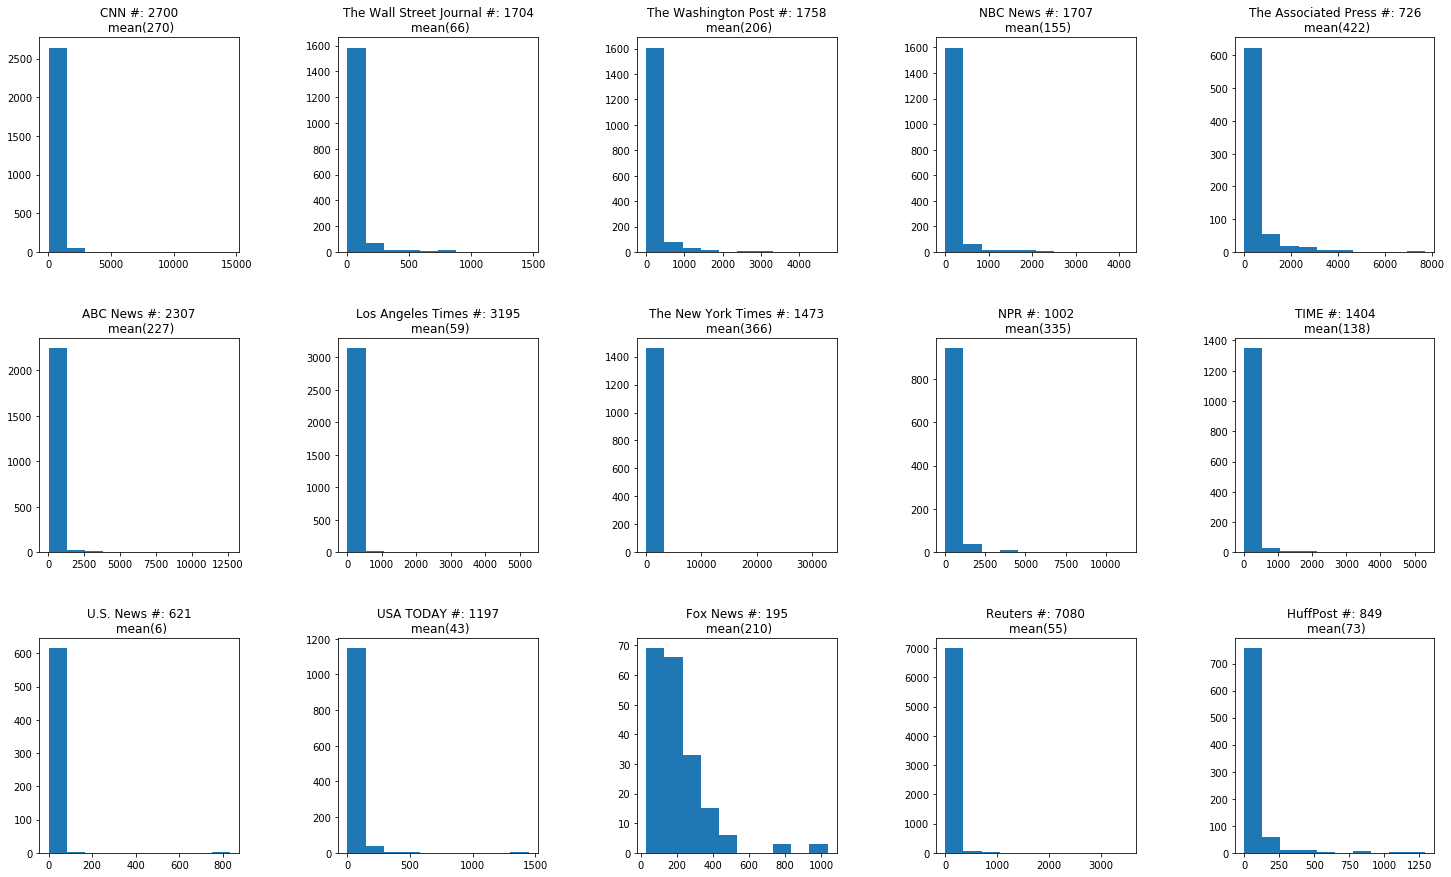

In [176]:
count = 1
fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for key, value in outlet_lists.items():
    ax = fig.add_subplot(3, 5, count)
    ax.hist(value, density=False, bins=10) 
    mean = str(int(scipy.mean(value)))
    tweets = str(len(value))
    ax.title.set_text(str(key + " #: " + tweets + "\n mean(" + mean + ")"))
    
    #ax.text(25, 35, str("mean: " + mean),fontsize=8, ha='center')
    #plt.subplot(5,3,count)
    #plt.hist(outlet_lists['CNN'], density=False, bins=10) 
    count += 1

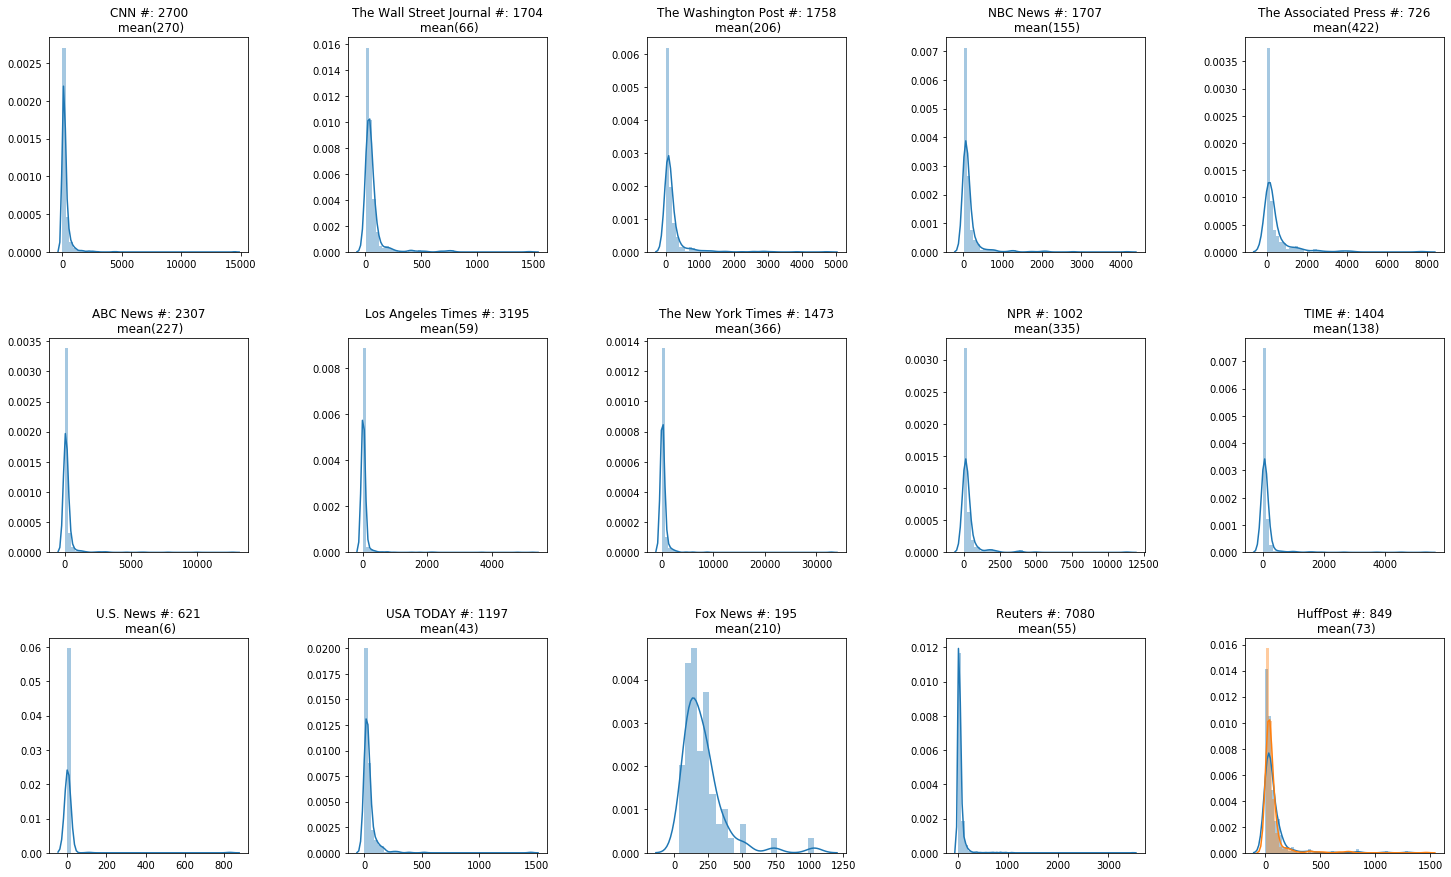

In [180]:
count = 1
fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for key, value in outlet_lists.items():
    ax = fig.add_subplot(3, 5, count)
    sns.distplot(value, ax=ax)
    #ax.hist(value, density=False, bins=10) 
    mean = str(int(scipy.mean(value)))
    tweets = str(len(value))
    ax.title.set_text(str(key + " #: " + tweets + "\n mean(" + mean + ")"))
    
    #ax.text(25, 35, str("mean: " + mean),fontsize=8, ha='center')
    #plt.subplot(5,3,count)
    #plt.hist(outlet_lists['CNN'], density=False, bins=10) 
    count += 1
sns.distplot(outlet_lists["The Wall Street Journal"])